##  Predict Price of Diamonds Problem

# Problem Defintion

 **Description**

Diamonds are the Precious stone consisting of a clear and colourless Crystalline form of pure carbon.
They are the hardest Gemstones known to man and can be scratched only by other Diamonds.

This classic dataset contains the prices and other attributes of almost 54,000 diamonds.



**Resources**

 * https://www.kaggle.com/shivam2503/diamonds

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

## Read Dataset

1. **carat** weight of the diamond (0.2--5.01)
2. **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
3. **color** diamond colour, from J (worst) to D (best)
4. **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
5. **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
6. **table** width of top of diamond relative to widest point (43--95)
7. **price** price in US dollars (\$326--\$18,823)
8. **x** length in mm (0--10.74)
9. **y** width in mm (0--58.9)
10. **z** depth in mm (0--31.8)

In [2]:
df = pd.read_csv('diamonds.csv')
df

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

# Data Analyis

**Question**

1. Remove -Unnamed: 0- Column because we already have Index
2. Summary of data 
3. Describe data 
4. Correlation Data
5. Pandas Profiling Report
6. The Ideal quality diamonds with low Weight
7. The Ideal quality diamonds with low Price
8. The best color diamonds with low Price
9. The best clarity diamonds with low Price
10. Which cut that contain high price
11. Average Price cut
12. Average Price color
13. Average Price clarity
14. The best quality,color and clarity diamonds with low Price
15. Which quality & color & clarity are Popular ?
16. The Expensive Diamonds which weight 5 carat
17. What are the Specifications of Expensive Diamonds ?

In [3]:
# Remove -Unnamed: 0- Column because we already have Index
df.drop('Unnamed: 0',axis = 1 ,inplace=True)

In [4]:
#Summary of data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
# Describe data
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

<AxesSubplot:>

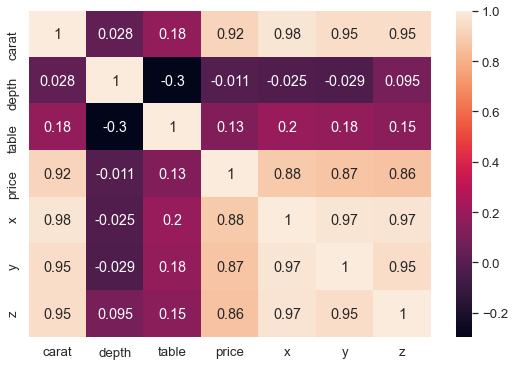

In [6]:
# Correlation Data
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True)

In [7]:
# Pandas Profiling Report 
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

In [8]:
# the Ideal quality diamonds with low Weight
df[df['cut'] == 'Ideal'].sort_values(by='carat',ascending=True).head()

carat    cut color clarity  depth  table  price     x     y     z
31595   0.20  Ideal     E     VS2   59.7   55.0    367  3.86  3.84  2.30
31597   0.20  Ideal     D     VS2   61.5   57.0    367  3.81  3.77  2.33
31599   0.20  Ideal     E     VS2   62.2   57.0    367  3.76  3.73  2.33
0       0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
52302   0.23  Ideal     E     VS2   61.8   54.0    548  3.94  3.96  2.44

In [9]:
# The Ideal quality diamonds with low Price
df[df['cut'] == 'Ideal'].sort_values(by='price',ascending=True).head()

carat    cut color clarity  depth  table  price     x     y     z
0       0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
11      0.23  Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
13      0.31  Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
16      0.30  Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
28262   0.25  Ideal     H     SI1   62.8   54.0    357  4.05  4.07  2.55

In [10]:
# The best color diamonds with low Price
df[df['color'] == 'D'].sort_values(by='price',ascending=True).head()

carat        cut color clarity  depth  table  price     x     y     z
28      0.23  Very Good     D     VS2   60.5   61.0    357  3.96  3.97  2.40
28261   0.23  Very Good     D     VS1   61.8   57.0    357  3.90  3.93  2.42
28271   0.32       Good     D      I1   64.0   54.0    361  4.33  4.36  2.78
28272   0.23  Very Good     D     VS2   62.7   58.0    362  3.86  3.89  2.43
28287   0.24  Very Good     D     VS1   61.1   60.0    367  3.96  3.99  2.43

In [11]:
# The best clarity diamonds with low Price
df[df['clarity'] == 'IF'].sort_values(by='price',ascending=True).head()

carat        cut color clarity  depth  table  price     x     y     z
31610   0.23  Very Good     H      IF   63.9   55.0    369  3.89  3.90  2.49
30942   0.24  Very Good     H      IF   61.3   56.0    449  4.04  4.06  2.48
34284   0.26      Ideal     H      IF   61.1   57.0    468  4.12  4.16  2.53
37924   0.23  Very Good     F      IF   61.0   62.0    485  3.95  3.99  2.42
38617   0.30      Ideal     J      IF   61.5   57.0    489  4.29  4.36  2.66

In [12]:
# Which cut that contain high price
df.groupby(by=['cut']).max().sort_values(by='price',ascending=False)['price']

cut
Premium      18823
Very Good    18818
Ideal        18806
Good         18788
Fair         18574
Name: price, dtype: int64

In [13]:
# Average Price cut
df.groupby(by = ['cut']).mean()['price']

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

In [14]:
# Average Price color
df.groupby(by = ['color']).mean()['price']

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

In [15]:
# Average Price clarity
df.groupby(by = ['clarity']).mean()['price']

clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64

In [16]:
# The best quality,color and clarity diamonds with low Price

df[(df['clarity'] == 'IF')& (df['color'] == 'D')&(df['cut'] == 'Ideal')].sort_values(by='price',ascending=True)

carat    cut color clarity  depth  table  price     x     y     z
35228   0.27  Ideal     D      IF   62.4   56.0    893  4.15  4.12  2.58
41826   0.31  Ideal     D      IF   61.1   56.0   1251  4.39  4.42  2.69
42410   0.31  Ideal     D      IF   61.1   56.0   1310  4.42  4.39  2.69
47949   0.31  Ideal     D      IF   60.5   57.0   1917  4.39  4.41  2.66
50672   0.34  Ideal     D      IF   59.8   57.0   2287  4.57  4.59  2.74
50671   0.34  Ideal     D      IF   62.1   57.0   2287  4.46  4.52  2.79
51174   0.34  Ideal     D      IF   59.8   57.0   2346  4.59  4.57  2.74
51173   0.34  Ideal     D      IF   62.1   57.0   2346  4.52  4.46  2.79
3680    0.51  Ideal     D      IF   62.0   56.0   3446  5.14  5.18  3.20
3682    0.51  Ideal     D      IF   62.1   55.0   3446  5.12  5.13  3.19
4000    0.53  Ideal     D      IF   61.5   54.0   3517  5.27  5.21  3.22
5345    0.53  Ideal     D      IF   62.2   55.0   3812  5.17  5.19  3.22
5457    0.63  Ideal     D      IF   61.2   53.0   3832  5.55  5.60  3.41
7037    0.59  Ideal     D      IF   60.7   58.0   4161  5.45  5.49  3.32
7320    0.59  Ideal     D      IF   60.9   57.0   4208  5.40  5.43  3.30
7357    0.56  Ideal     D      IF   62.4   56.0   4216  5.24  5.28  3.28
7809    0.56  Ideal     D      IF   61.9   57.0   4293  5.28  5.31  3.28
9600    0.56  Ideal     D      IF   60.8   58.0   4632  5.35  5.31  3.24
11017   0.59  Ideal     D      IF   60.9   60.0   4916  5.41  5.39  3.29
16404   0.63  Ideal     D      IF   62.5   55.0   6549  5.47  5.50  3.43
16540   0.63  Ideal     D      IF   62.5   55.0   6607  5.50  5.47  3.43
25622   1.04  Ideal     D      IF   61.8   57.0  14494  6.49  6.52  4.02
25718   1.04  Ideal     D      IF   61.8   57.0  14626  6.52  6.49  4.02
26198   1.02  Ideal     D      IF   63.0   57.0  15575  6.39  6.35  4.01
26311   1.06  Ideal     D      IF   61.2   57.0  15813  6.57  6.61  4.03
26660   1.00  Ideal     D      IF   60.7   57.0  16469  6.44  6.48  3.92
26965   1.07  Ideal     D      IF   60.9   54.0  17042  6.66  6.73  4.08
27226   1.03  Ideal     D      IF   62.0   56.0  17590  6.55  6.44  4.03

In [17]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [18]:
# Which quality & color & clarity are Popular ?
col = ['cut','color','clarity']
for i in col :
    print(f'Column : {i} ')
    print(df[i].value_counts())
    print('-----------------------')
    

Column : cut 
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
-----------------------
Column : color 
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
-----------------------
Column : clarity 
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
-----------------------


In [19]:
# The price of Expensive Diamonds that weight 5 carat  
df[df['carat']>= 5]

carat   cut color clarity  depth  table  price      x      y     z
27415   5.01  Fair     J      I1   65.5   59.0  18018  10.74  10.54  6.98

In [20]:
# What are the Specifications of Expensive Diamonds ?
df.sort_values(by='price',ascending=False)

carat        cut color clarity  depth  table  price     x     y     z
27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50  8.47  5.16
27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90  7.97  5.04
27747   1.51      Ideal     G      IF   61.7   55.0  18806  7.37  7.41  4.56
27746   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11
27745   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95  8.00  5.01
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43

[53940 rows x 10 columns]

# Data Visualization


**Numerical Features** 

* carat
* depth
* table
* price
* volume

**Numerical Features - Univariate**

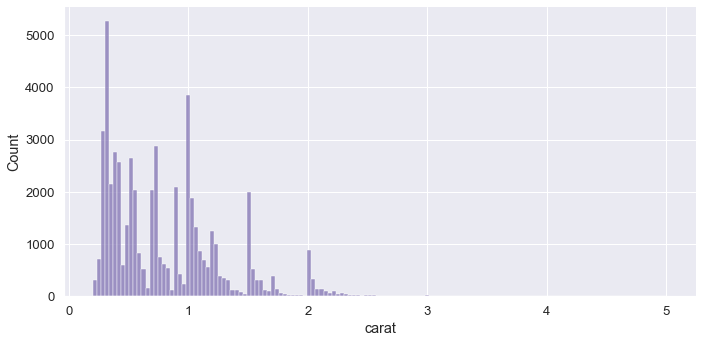

In [21]:
sns.displot(df['carat'],color='m',kde=False,aspect=2)

In [22]:
sns.displot(df['depth'],color='m',kde=False,aspect=2)

In [23]:
sns.displot(df['table'],color='m',kde=False,aspect=2)

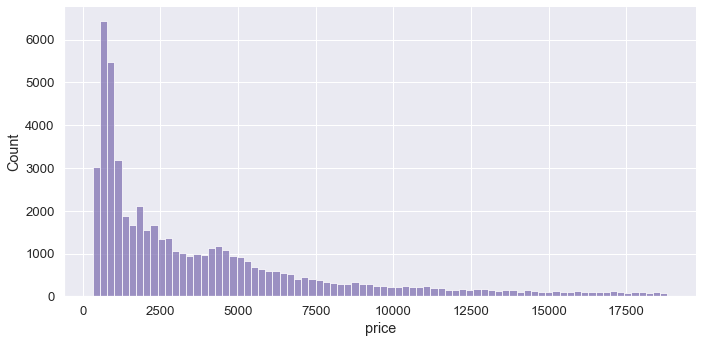

In [24]:
sns.displot(df['price'],color='m',kde=False,aspect=2)

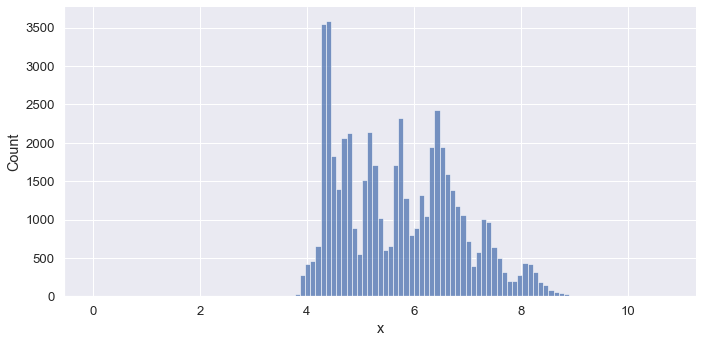

In [25]:
sns.displot(df['x'],color='b',kde=False,aspect=2)

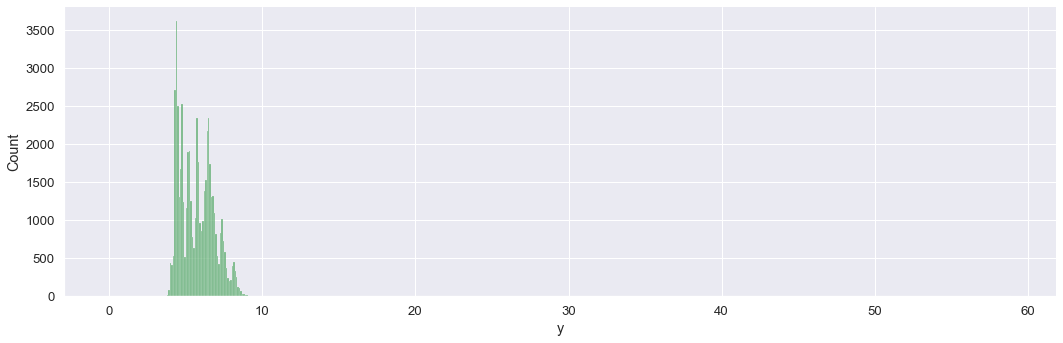

In [26]:
sns.displot(df['y'],color='g',kde=False,aspect=3)

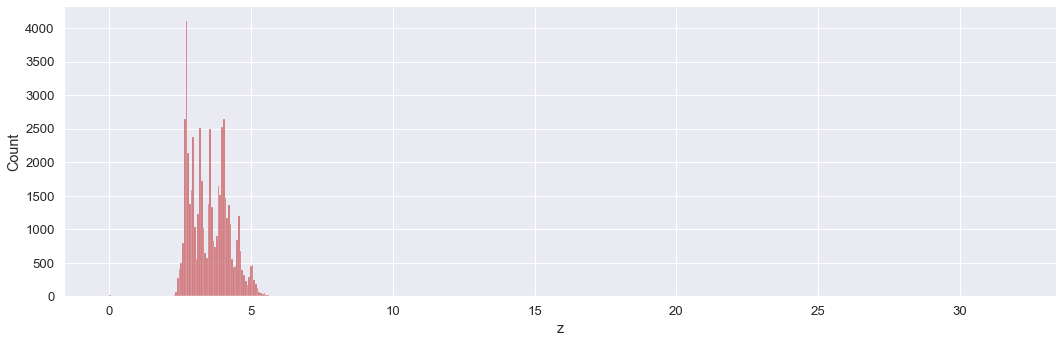

In [27]:
sns.displot(df['z'],color='r',kde=False,aspect=3)

**Numerical Features - Bivariate**

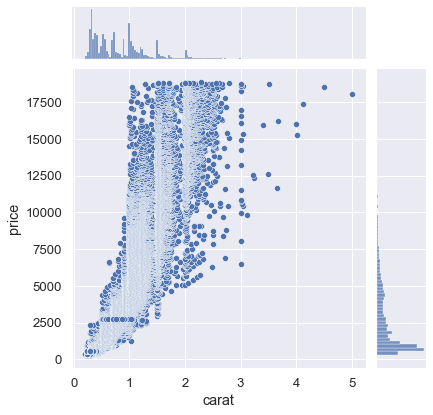

In [28]:
sns.jointplot(data =df , x='carat' , y ='price')

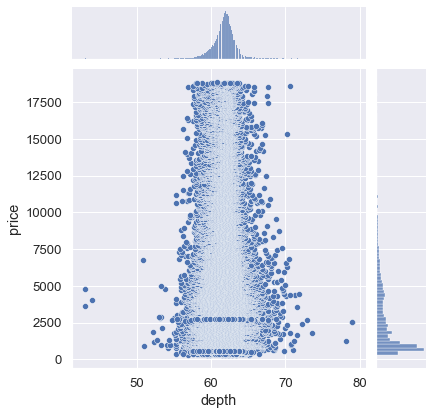

In [29]:
sns.jointplot(data =df , x='depth' , y ='price')

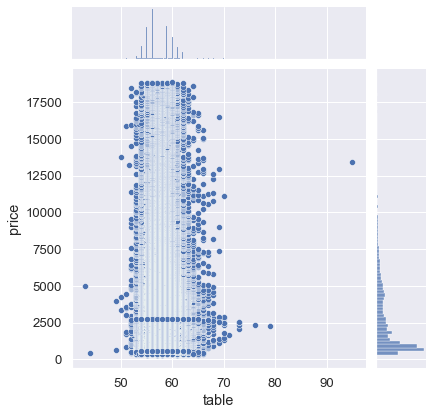

In [30]:
sns.jointplot(data =df , x='table' , y ='price')

In [31]:
sns.jointplot(data =df , x='x' , y ='price')

In [32]:
sns.jointplot(data =df , x='y' , y ='price')

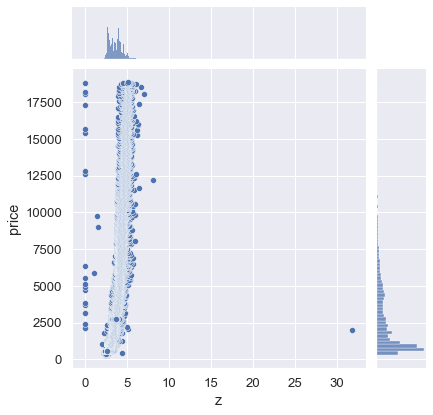

In [33]:
sns.jointplot(data =df , x='z' , y ='price')

**Categorical Features**

* cut	
* color	
* clarity


**Categorical Features - Univariate**

In [34]:
sns.countplot(data = df , x = 'cut')

<AxesSubplot:xlabel='cut', ylabel='count'>

<AxesSubplot:xlabel='color', ylabel='count'>

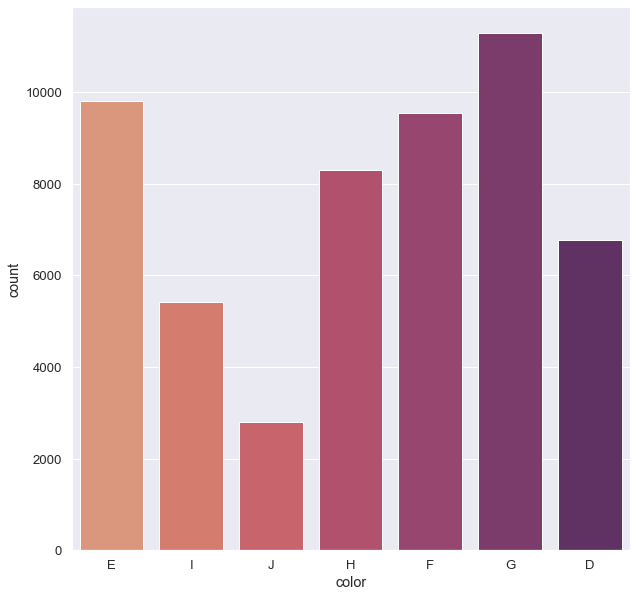

In [35]:
sns.countplot(data = df , x = 'color',palette='flare')

In [36]:
sns.countplot(data = df , x = 'clarity',palette='mako')

<AxesSubplot:xlabel='clarity', ylabel='count'>

**Categorical Features - Bivariate**

<AxesSubplot:xlabel='cut', ylabel='price'>

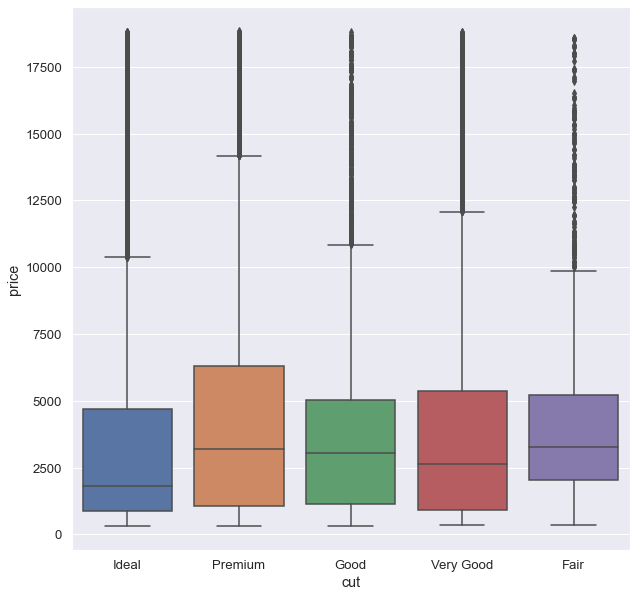

In [37]:
sns.boxplot(data = df , x = 'cut',y='price')

<AxesSubplot:xlabel='color', ylabel='price'>

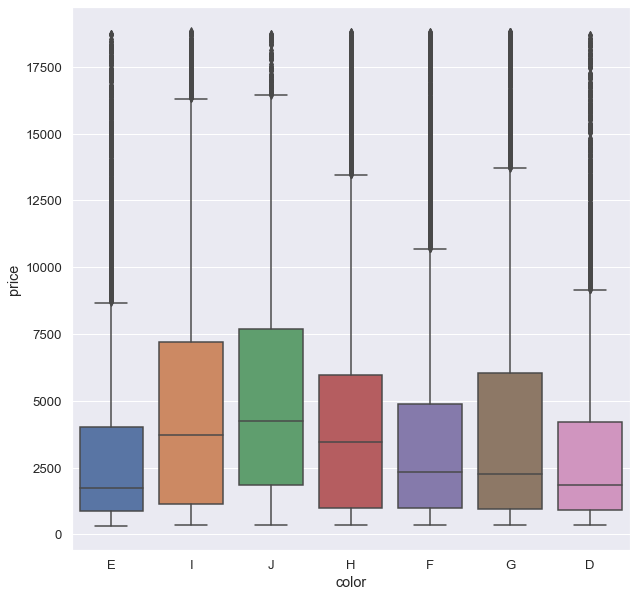

In [38]:
sns.boxplot(data = df , x = 'color',y='price')

<AxesSubplot:xlabel='clarity', ylabel='price'>

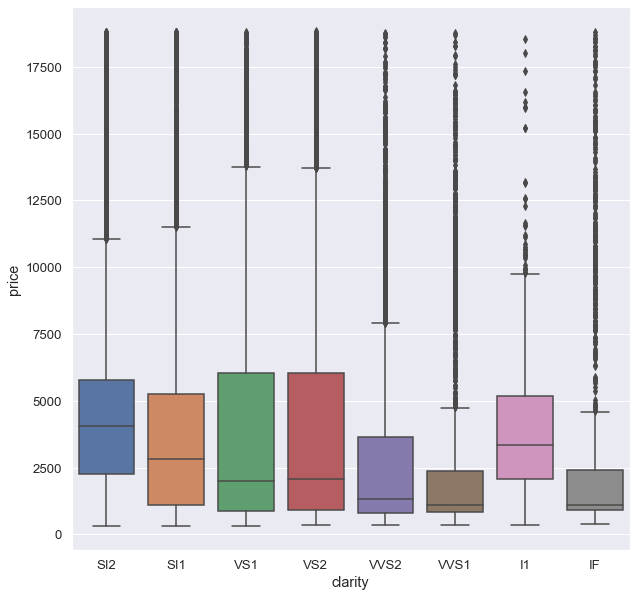

In [39]:
sns.boxplot(data = df , x = 'clarity',y='price')

**Matrix plot**

In [40]:
new = pd.pivot_table(data=df, values='price',index='color',columns ='cut')
new

cut           Fair         Good        Ideal      Premium    Very Good
color                                                                 
D      4291.061350  3405.382175  2629.094566  3631.292576  3470.467284
E      3682.312500  3423.644159  2597.550090  3538.914420  3214.652083
F      3827.003205  3495.750275  3374.939362  4324.890176  3778.820240
G      4239.254777  4123.482204  3720.706388  4500.742134  3872.753806
H      5135.683168  4276.254986  3889.334831  5216.706780  4535.390351
I      4685.445714  5078.532567  4451.970377  5946.180672  5255.879568
J      4975.655462  4574.172638  4918.186384  6294.591584  5103.513274

<AxesSubplot:xlabel='cut', ylabel='color'>

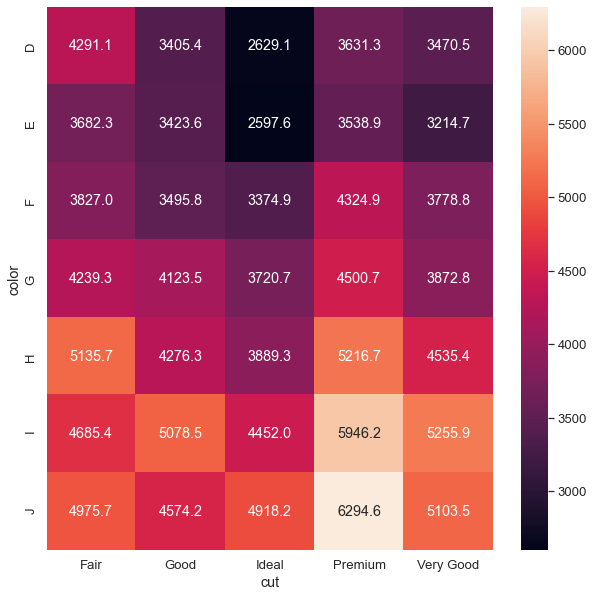

In [41]:
sns.heatmap(new,annot=True,fmt='0.1f')

In [42]:
new = pd.pivot_table(data=df, values='price',index='color',columns ='clarity')
new

clarity           I1           IF          SI1          SI2          VS1  \
color                                                                      
D        3863.023810  8307.369863  2976.146423  3931.101460  3030.158865   
E        3488.421569  3668.506329  3161.838005  4173.826036  2856.294301   
F        3342.181818  2750.836364  3714.225716  4472.625233  3796.717742   
G        3545.693333  2558.033774  3774.787449  5021.684109  4131.362197   
H        4453.413580  2287.869565  5032.414945  6099.895074  3780.688623   
I        4302.184783  1994.937063  5355.019663  7002.649123  4633.183992   
J        5254.060000  3363.882353  5186.048000  6520.958246  4884.461255   

clarity          VS2         VVS1         VVS2  
color                                           
D        2587.225692  2947.912698  3351.128391  
E        2750.941700  2219.820122  2499.674067  
F        3756.795093  2804.276567  3475.512821  
G        4416.256498  2866.820821  3845.283437  
H        4722.414486  1845.658120  2649.067434  
I        5690.505560  2034.861972  2968.232877  
J        5311.058824  4034.175676  5142.396947

<AxesSubplot:xlabel='clarity', ylabel='color'>

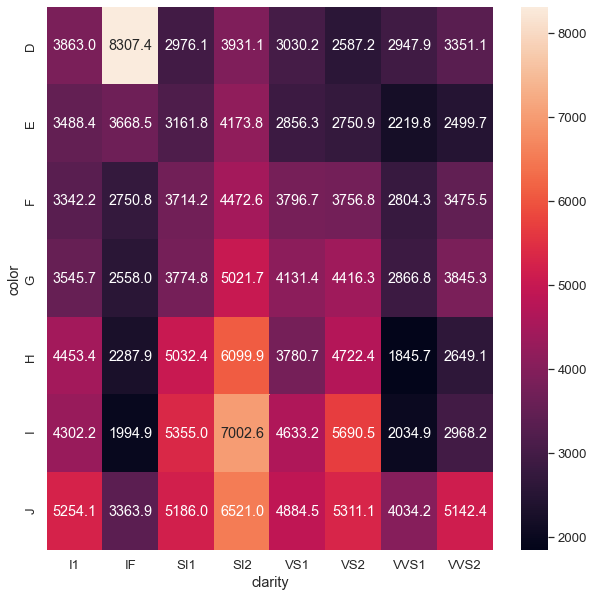

In [43]:
sns.heatmap(new,annot=True,fmt='0.1f')

In [44]:
new = pd.pivot_table(data=df, values='price',index='cut',columns ='clarity')
new

clarity             I1           IF          SI1          SI2          VS1  \
cut                                                                          
Fair       3703.533333  1912.333333  4208.279412  5173.916309  4165.141176   
Good       3596.635417  4098.323944  3689.533333  4580.260870  3801.445988   
Ideal      4335.726027  2272.913366  3752.118169  4755.952656  3489.744497   
Premium    3947.331707  3856.143478  4455.269371  5545.936928  4485.462041   
Very Good  4078.226190  4396.216418  3932.391049  4988.688095  3805.353239   

clarity            VS2         VVS1         VVS2  
cut                                               
Fair       4174.724138  3871.352941  3349.768116  
Good       4262.236196  2254.774194  3079.108392  
Ideal      3284.550385  2468.129458  3250.290100  
Premium    4550.331248  2831.206169  3795.122989  
Very Good  4215.759552  2459.441065  3037.765182

In [45]:
sns.heatmap(new,annot=True,fmt='0.1f')

<AxesSubplot:xlabel='clarity', ylabel='cut'>

# Data Preprocessing

* Data Cleaning or Cleansing
* Work with Missing Data
* Work With Categorical Data
* Detect and Handle outlier
* Split data to train and test sets
* Feature Scaling

#### Data Cleaning or Cleansing

Numerical Feature Cleaning
* Check numeric columns Dtype 
* Use Describe to make sure values is true

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [47]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [48]:
# Diamonds which have x or y or z equale Zero
df[(df['x']==0)|(df['y']==0)|(df['z']==0)]

carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.00  0.00  0.0
27112   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.0
27503   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0
27739   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
51506   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0

In [49]:
# Feature Engineering
def clear (data):
    if data == 0 :
        return np.nan
    else :
        return data
df['x'] = df['x'].apply(clear)
df['y'] = df['y'].apply(clear)
df['z'] = df['z'].apply(clear)

Categorical Feature Cleaning

* Use Unique to check the categorical feature values

In [50]:
for col in ['cut','color','clarity']:
    print(f'----{col}----')
    print(df[col].unique())

----cut----
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
----color----
['E' 'I' 'J' 'H' 'F' 'G' 'D']
----clarity----
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [51]:
# Work with Missing Data
df.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [52]:
df.dropna(inplace=True)

In [53]:
# Work With Categorical Data
df = pd.get_dummies(df,drop_first=[True])
df.head()

carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43         0          1   
1   0.21   59.8   61.0    326  3.89  3.84  2.31         0          0   
2   0.23   56.9   65.0    327  4.05  4.07  2.31         1          0   
3   0.29   62.4   58.0    334  4.20  4.23  2.63         0          0   
4   0.31   63.3   58.0    335  4.34  4.35  2.75         1          0   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0            0  ...        0        0        0           0            0   
1            1  ...        0        0        0           0            1   
2            0  ...        0        0        0           0            0   
3            1  ...        0        1        0           0            0   
4            0  ...        0        0        1           0            0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0            1            0            0             0             0  
1            0            0            0             0             0  
2            0            1            0             0             0  
3            0            0            1             0             0  
4            1            0            0             0             0  

[5 rows x 24 columns]

In [54]:
# Split data to train and test sets
x = df.drop('price',axis = 1)
y = df['price']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [57]:
print('x_train : ',x_train.shape)
print('x_test : ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

x_train :  (43136, 23)
x_test :  (10784, 23)
y_train :  (43136,)
y_test :  (10784,)


In [58]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [59]:
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Machine Learning

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [61]:
models = {
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor()
}

In [62]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('-----------------------------------------------------------')

Using model: LinearRegression
Training Score: 0.9195780368290958
Test Score: 0.922168605335305
RMSE: 1114.682326966294
-----------------------------------------------------------
Using model: KNeighborsRegressor
Training Score: 0.9724272484915865
Test Score: 0.9569548510559895
RMSE: 828.964278887435
-----------------------------------------------------------
Using model: SVR
Training Score: 0.3406658606271371
Test Score: 0.3390028435004473
RMSE: 3248.429941496322
-----------------------------------------------------------
Using model: DecisionTreeRegressor
Training Score: 0.9999950331210109
Test Score: 0.9554789239250484
RMSE: 843.0562173398814
-----------------------------------------------------------
Using model: RandomForestRegressor
Training Score: 0.9965963430415048
Test Score: 0.9764518127831874
RMSE: 613.129834585032
-----------------------------------------------------------
Using model: XGBRegressor
Training Score: 0.9885252348056317
Test Score: 0.9786042801138121
RMSE: 584.4

In [63]:
model = XGBRegressor()

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
y_pred = model.predict(x_test)
y_pred

array([2003.136 , 4171.112 , 4728.5864, ..., 3004.4695, 2593.1294,
       1313.5535], dtype=float32)

In [65]:
y_test

49930    2184
7741     4278
5995     3957
53467    2679
47721    1887
         ... 
13104    5424
45867    1716
1271     2949
53432    2671
42464    1316
Name: price, Length: 10784, dtype: int64

### Testing on real data and deployment

In [66]:
import joblib

In [67]:
joblib.dump(model, 'model.h9')

['model.h9']

In [68]:
joblib.dump(scaler, 'scaler.h9')

['scaler.h9']

In [69]:
x.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [70]:
test_data = [2.5, 60.2, 90, 7.8, 3.72, 8.1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,0,0,0,0,0]
len(test_data)

23

In [71]:
test_data = scaler.transform([test_data])

In [72]:
model.predict(test_data)

array([7581.1987], dtype=float32)